In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import sklearn

In [2]:
np.random.seed(128)

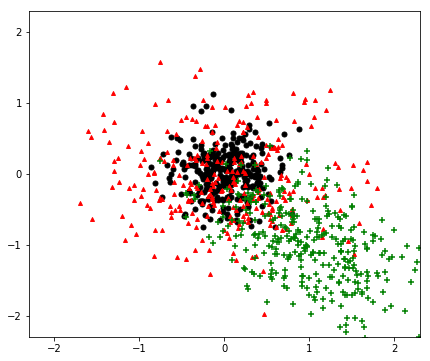

In [3]:
mu1 = [0, 0]
mu2 = [0, 0]
mu3 = [1, -1]
sigma1 = [[0.1, 0], [0, 0.1]]
sigma2 = [[0.5, 0], [0, 0.5]]
sigma3 = [[0.3, -0.15], [-0.15, 0.3]]
p1 = 1.0/3.0
p2 = 1.0/3.0
p3 = 1- p1 - p2

def gen_data(N, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2):
    y = np.random.choice([1, 2, 3], N, p=[p1, p2, 1 - p1 - p2])
    X = np.zeros((N,2))
    N1 = np.count_nonzero(y == 1)
    N2 = np.count_nonzero(y == 2)
    N3 = np.count_nonzero(y == 3)
    X[y==1, ] = np.random.multivariate_normal(mu1, sigma1, N1)
    X[y==2, ] = np.random.multivariate_normal(mu2, sigma2, N2)
    X[y==3, ] = np.random.multivariate_normal(mu3, sigma3, N3)
    return X, y

X, y = gen_data(900, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2)

fig, ax = plt.subplots()
plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=25)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=15)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=40)
fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

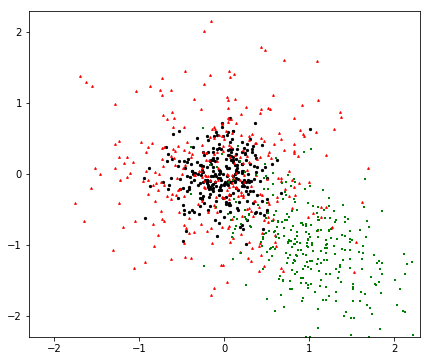

In [4]:
mu1 = [0, 0]
mu2 = [0, 0]
mu3 = [1, -1]
sigma1 = [[0.1, 0], [0, 0.1]]
sigma2 = [[0.5, 0], [0, 0.5]]
sigma3 = [[0.3, -0.15], [-0.15, 0.3]]
p1 = 1.0/3.0
p2 = 1.0/3.0
p3 = 1- p1 - p2

def gen_data(N, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2):
    y = np.random.choice([1, 2, 3], N, p=[p1, p2, 1 - p1 - p2])
    X = np.zeros((N,2))
    N1 = np.count_nonzero(y == 1)
    N2 = np.count_nonzero(y == 2)
    N3 = np.count_nonzero(y == 3)
    X[y==1, ] = np.random.multivariate_normal(mu1, sigma1, N1)
    X[y==2, ] = np.random.multivariate_normal(mu2, sigma2, N2)
    X[y==3, ] = np.random.multivariate_normal(mu3, sigma3, N3)
    return X, y

X, y = gen_data(900, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2)

fig, ax = plt.subplots()
plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=5)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=3)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=8)
fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

https://stackoverflow.com/questions/23204320/drawing-decision-boundary-of-two-multivariate-gaussian-in-python

https://stackoverflow.com/questions/19576761/drawing-decision-boundary-of-two-multivariate-gaussian

https://xavierbourretsicotte.github.io/Optimal_Bayes_Classifier.html

https://xavierbourretsicotte.github.io/LDA_QDA.html

https://stackoverflow.com/questions/11615664/multivariate-normal-density-in-python

https://www.geeksforgeeks.org/visualizing-the-bivariate-gaussian-distribution-in-python/

https://stackoverflow.com/questions/48639028/how-to-plot-decision-boundaries-between-3-classes-using-discriminant-functions

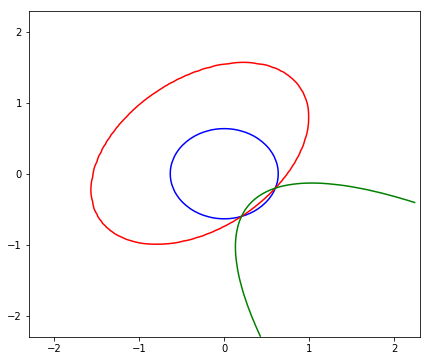

In [5]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def decision_boudary(func_a, func_b, _grid_X, _grid_Y):
    return np.vectorize(func_a)(_grid_X, _grid_Y) - \
            np.vectorize(func_b)(_grid_X, _grid_Y)

feature_x = np.arange(-2.3, 2.3, 0.05)
feature_y = np.arange(-2.3, 2.3, 0.05)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)
Z12 = decision_boudary(dist_1, dist_2, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z12, [0], colors='blue')
Z13 = decision_boudary(dist_1, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z13, [0], colors='red')
Z23 = decision_boudary(dist_2, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z23, [0], colors='green')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


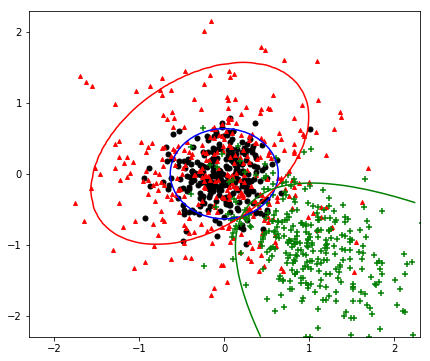

In [6]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def decision_boudary(func_a, func_b, _grid_X, _grid_Y):
    return np.vectorize(func_a)(_grid_X, _grid_Y) - \
            np.vectorize(func_b)(_grid_X, _grid_Y)

feature_x = np.arange(-2.3, 2.3, 0.05)
feature_y = np.arange(-2.3, 2.3, 0.05)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)
plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=25)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=15)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=40)
Z12 = decision_boudary(dist_1, dist_2, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z12, [0], colors='blue')
Z13 = decision_boudary(dist_1, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z13, [0], colors='red')
Z23 = decision_boudary(dist_2, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z23, [0], colors='green')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


In [7]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def compare_find_equals(number_a, number_b, number_c):
    if abs(number_a - number_b) / number_a <= 0.1 and abs(number_a - number_c) / number_a <= 0.1:
        print(number_a)
        return 1
    return 0
    
feature_x = np.arange(-2.3, 2.3, 0.05)
feature_y = np.arange(-2.3, 2.3, 0.05)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)
matrix_a = np.vectorize(dist_1)(grid_X, grid_Y)
matrix_b = np.vectorize(dist_2)(grid_X, grid_Y)
matrix_c = np.vectorize(dist_3)(grid_X, grid_Y)
np.vectorize(compare_find_equals)(matrix_a, matrix_b, matrix_c)

0.21539279301848246
0.21539279301849612


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
def find_intersection_points(_px, _py, number_a):
    if dist_1(_px, _py) == number_a:
        print(_px, _py)
        return 1
    return 0

np.vectorize(find_intersection_points)(grid_X, grid_Y, 0.21539279301848246)
print("\n######\n")
np.vectorize(find_intersection_points)(grid_X, grid_Y, 0.21539279301849612)

0.1999999999999913 -0.6000000000000059
-0.6000000000000059 0.1999999999999913

######

0.5999999999999899 -0.20000000000000728
-0.20000000000000728 0.5999999999999899


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
p_intersection_1 = (0.2, -0.6)
p_intersection_2 = (0.6, -0.2)

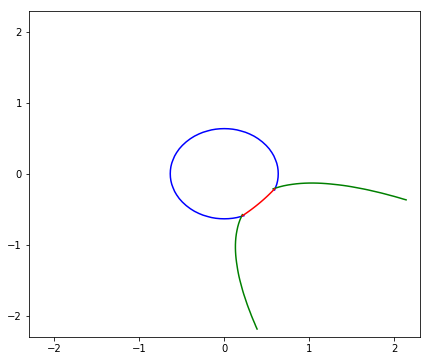

In [10]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def decision_boudary(func_a, func_b, _grid_X, _grid_Y):
    return np.vectorize(func_a)(_grid_X, _grid_Y) - \
            np.vectorize(func_b)(_grid_X, _grid_Y)

# https://matplotlib.org/2.0.2/examples/pylab_examples/contourf_demo.html
def cut_off_decision_boudary_within_rec(_grid_X, _grid_Y, matrix):
    def cut_within_rec(_px, _py, _element):
        if(0.2 < _px < 0.6 - 0.05 and -0.6 < _py < -0.2 - 0.05):
            return np.nan
        else:
            return _element
    return np.vectorize(cut_within_rec)(_grid_X, _grid_Y, matrix)
        
feature_x = np.arange(-2.2, 2.2, 0.05)
feature_y = np.arange(-2.2, 2.2, 0.05)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)


feature_x_rec = np.arange(0.2, 0.61, 0.01)
feature_y_rec = np.arange(-0.6, -0.19, 0.01)
[grid_X_rec, grid_Y_rec] = np.meshgrid(feature_x_rec, feature_y_rec)

fig, ax = plt.subplots(1, 1)
_Z12 = decision_boudary(dist_1, dist_2, grid_X, grid_Y)
Z12 = cut_off_decision_boudary_within_rec(grid_X, grid_Y, _Z12)
ax.contour(grid_X, grid_Y, Z12, [0], colors='blue')
_Z23 = decision_boudary(dist_2, dist_3, grid_X, grid_Y)
Z23 = cut_off_decision_boudary_within_rec(grid_X, grid_Y, _Z23)
ax.contour(grid_X, grid_Y, Z23, [0], colors='green')

Z13 = decision_boudary(dist_1, dist_3, grid_X_rec, grid_Y_rec)
ax.contour(grid_X_rec, grid_Y_rec, Z13, [0], colors='red')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


https://stackoverflow.com/questions/48639028/how-to-plot-decision-boundaries-between-3-classes-using-discriminant-functions

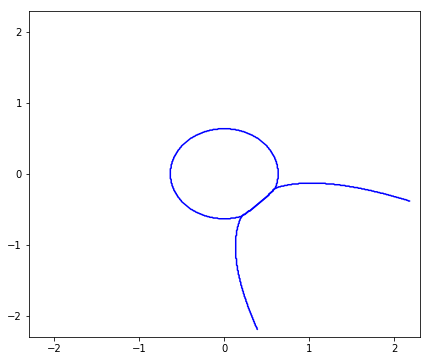

In [11]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

# https://stackoverflow.com/questions/48639028/
def compare_and_assign_value(number_a, number_b, number_c):
    z = np.array([number_a, number_b, number_c])
    return np.argmax(z) + 1
    
def decision_boudary(func_a, func_b, func_c, _grid_X, _grid_Y):
    matrix_a = np.vectorize(func_a)(_grid_X, _grid_Y)
    matrix_b = np.vectorize(func_b)(_grid_X, _grid_Y)
    matrix_c = np.vectorize(func_c)(_grid_X, _grid_Y)
    return np.vectorize(compare_and_assign_value)(matrix_a, matrix_b, matrix_c)
    

feature_x = np.arange(-2.2, 2.2, 0.01)
feature_y = np.arange(-2.2, 2.2, 0.01)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)

Z_bayes = decision_boudary(dist_1, dist_2, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z_bayes, levels=[1.5, 2.5, 3.5], colors='b')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


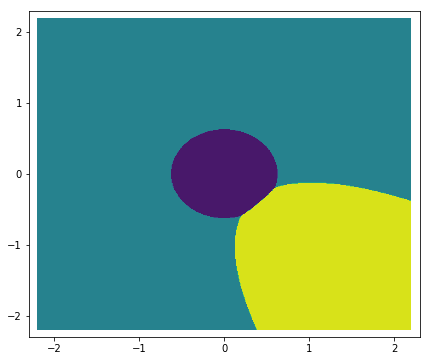

In [12]:
fig, ax = plt.subplots(1, 1)

ax.contourf(grid_X, grid_Y, Z_bayes)

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

We can't use dropout with sklearn's MLPClassifier.

https://datascience.stackexchange.com/questions/24275/scikit-mlpclassifier-vs-tensorflow-dnnclassifier

https://github.com/scikit-learn/scikit-learn/issues/6175

So we will use Keras instead.

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer, Dense, Dropout, \
                Activation, ActivityRegularization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import regularizers

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_train = scaler.transform(X)

In [15]:
y_train = to_categorical(y - 1, num_classes=3, dtype ="uint8")

In [16]:
(y - 1)[:10]

array([0, 2, 2, 0, 0, 1, 2, 2, 0, 1])

In [17]:
y[:10]

array([1, 3, 3, 1, 1, 2, 3, 3, 1, 2])

In [18]:
y_train[:10]

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [19]:
X_train.shape

(900, 2)

In [20]:
X_train

array([[-0.3527991 ,  1.53501216],
       [ 1.89743866, -0.5159167 ],
       [ 0.42153937, -0.39814873],
       ...,
       [ 1.05051083,  2.60601066],
       [-0.60275719,  1.1997626 ],
       [-0.23024213,  0.95960032]])

In [21]:
y_train

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [22]:
num_labels = len(np.unique(y))
num_labels

3

https://stats.stackexchange.com/questions/383310/what-is-the-difference-between-kernel-bias-and-activity-regulizers-and-when-t

https://keras.io/api/layers/regularizers/

https://stackoverflow.com/questions/44495698/keras-difference-between-kernel-and-activity-regularizers

https://stackoverflow.com/questions/50630849/how-does-tf-keras-layers-activityregularization-work-and-how-to-use-it-correct

In [23]:
model = keras.Sequential(
    [
        InputLayer(2),
        Dense(20, activation="relu"),
        Dropout(0.5),
        Dense(10, activation="relu", kernel_regularizer=regularizers.L2(0.5)),
        Dense(num_labels, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
model.fit(X_train, y_train, epochs=1000, batch_size=100, verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [26]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Train loss:", score[0])
print("Train accuracy:", score[1])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Train loss: 0.6297721266746521
Train accuracy: 0.7077777981758118


In [27]:
feature_x = np.arange(-2.3, 2.3, 0.01)
feature_y = np.arange(-2.3, 2.3, 0.01)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

list_class_result_x = [[], [], []]
list_class_result_y = [[], [], []]

def get_predict_result(_px, _py):
    which = np.argmax(model.predict(
        scaler.transform([[_px, _py]]))[0])
    list_class_result_x[which].append(_px)
    list_class_result_y[which].append(_py)
    return which + 1

Z_neural_network = np.vectorize(get_predict_result)(grid_X, grid_Y)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


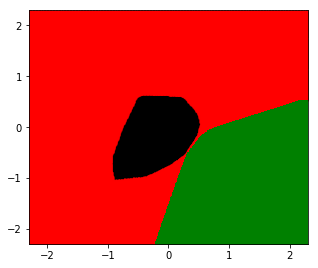

In [28]:
fig, ax = plt.subplots()
plt.scatter(np.array(list_class_result_x[0]), 
            np.array(list_class_result_y[0]), c='k', marker='o', s=2)
plt.scatter(np.array(list_class_result_x[1]), 
            np.array(list_class_result_y[1]), c='r', marker='^', s=1)
plt.scatter(np.array(list_class_result_x[2]), 
            np.array(list_class_result_y[2]), c='g', marker='+', s=3)
fig.set_size_inches(5, 4.3)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

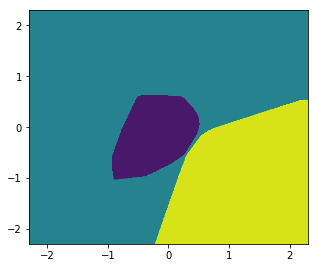

In [29]:
fig, ax = plt.subplots()

ax.contourf(grid_X, grid_Y, Z_neural_network)

fig.set_size_inches(5, 4.3)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

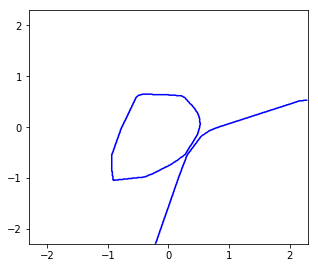

In [30]:
fig, ax = plt.subplots()

ax.contour(grid_X, grid_Y, Z_neural_network, levels=[1.5, 2.5, 3.5], colors='b')

fig.set_size_inches(5, 4.3)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

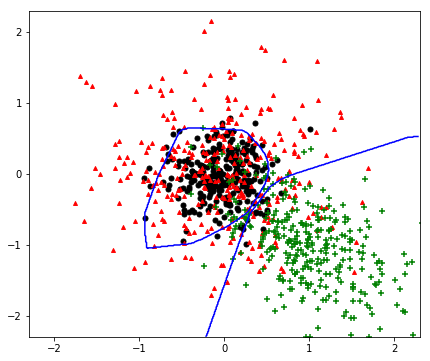

In [31]:
fig, ax = plt.subplots()

plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=25)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=15)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=40)

ax.contour(grid_X, grid_Y, Z_neural_network, levels=[1.5, 2.5, 3.5], colors='b')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

也就是不论是 SVM, 还是 NN，得到的结果肯定是一样的？

第二部分感觉跟 NN 没啥关系呢。

## Logistic Regression for Gaussian Data, which, of course, doesn't work

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logregc = LogisticRegression(solver='lbfgs', max_iter=1000)

In [34]:
X_train

array([[-0.3527991 ,  1.53501216],
       [ 1.89743866, -0.5159167 ],
       [ 0.42153937, -0.39814873],
       ...,
       [ 1.05051083,  2.60601066],
       [-0.60275719,  1.1997626 ],
       [-0.23024213,  0.95960032]])

In [35]:
y_train

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [36]:
logregc.fit(X_train, y)

LogisticRegression(max_iter=1000)

In [37]:
yc_pred = logregc.predict(X_train)

In [38]:
logregc.__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 1000,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'n_features_in_': 2,
 'classes_': array([1, 2, 3]),
 'coef_': array([[-0.72221533,  0.49257679],
        [-0.72196462,  0.61102126],
        [ 1.44417995, -1.10359805]]),
 'intercept_': array([ 0.12070734,  0.21254808, -0.33325542]),
 'n_iter_': array([11])}

In [39]:
perfc = sklearn.metrics.confusion_matrix(y, yc_pred)
print(perfc)
err_logregc = np.mean(y != yc_pred)
print(err_logregc)
print(1 - sum(np.diag(perfc)) / float(len(y)))
assert(np.round(err_logregc, 5) == 
       np.round(1 - sum(np.diag(perfc)) / float(len(y)), 5))

[[  1 261  10]
 [  9 251  55]
 [  1  43 269]]
0.4211111111111111
0.4211111111111111


https://scikit-learn.org/stable/modules/multiclass.html

In [40]:
from sklearn.multiclass import OneVsRestClassifier

In [41]:
logregd = OneVsRestClassifier(LogisticRegression())

logregd.fit(X_train, y)

OneVsRestClassifier(estimator=LogisticRegression())

In [42]:
yd_pred = logregd.predict(X_train)

In [43]:
perfd = sklearn.metrics.confusion_matrix(y, yd_pred)
print(perfd)
err_logregd = np.mean(y != yd_pred)
print(err_logregd)
print(1 - sum(np.diag(perfd)) / float(len(y)))
assert(np.round(err_logregd, 5) == 
       np.round(1 - sum(np.diag(perfd)) / float(len(y)), 5))

[[  0 257  15]
 [  5 249  61]
 [  0  29 284]]
0.4077777777777778
0.4077777777777778


https://www.kaggle.com/code/satishgunjal/multiclass-logistic-regression-using-sklearn/notebook

In [44]:
logrege = LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=1000)

logrege.fit(X_train, y)

ye_pred = logrege.predict(X_train)

perfe = sklearn.metrics.confusion_matrix(y, ye_pred)
print(perfe)
err_logrege = np.mean(y != ye_pred)
print(err_logrege)
print(1 - sum(np.diag(perfe)) / float(len(y)))
assert(np.round(err_logrege, 5) ==
       np.round(1 - sum(np.diag(perfe)) / float(len(y)), 5))

[[  0 257  15]
 [  5 249  61]
 [  0  29 284]]
0.4077777777777778
0.4077777777777778


## Foward Calculate, layer by layer, this could be one way to calculate Beta and Alpah

### Plot the Neural Network structure weights

In [45]:
from keras.utils.vis_utils import plot_model

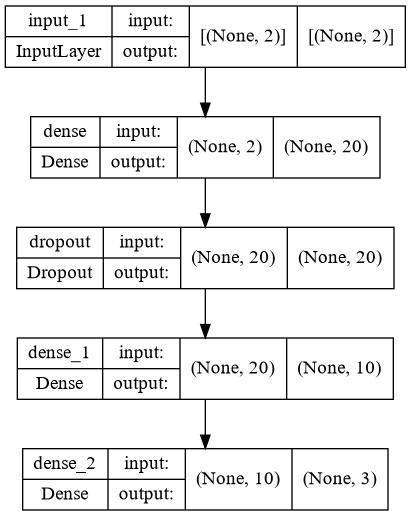

In [46]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [79]:
for layer in model.layers:
    print("\n\n////////////////////////////////////\n")
    print(layer.get_config())
    print("\n")
    print(layer.get_weights())




////////////////////////////////////

{'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 20, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


[array([[ 0.86442804,  1.479611  ,  1.4248353 , -1.660321  , -1.6473536 ,
         2.0292182 , -1.8620422 ,  1.3396239 ,  1.7271388 , -3.0167813 ,
        -1.5920037 ,  1.6855513 , -1.6565725 ,  1.5933226 , -1.366321  ,
        -1.7470237 ,  1.6668261 ,  2.5945926 ,  2.093737  ,  1.6791508 ],
       [-1.551467  , -1.3527277 ,  1.8583273 ,  1.754836  ,  1.8894718 ,
        -1.0257201 ,  1.2942113 , -1.2299773 , -1.5205834 , -0.7406447 ,
        -0.06836125,  1.9703193 , -1.2243427 , -1.4581287 ,  0.504258  ,
         1.802155  , -1.4012926 , -0.35224533, -0.92307657,

## Refer to Cell 40 of NNBelif_logistic_regresion.ipynb

In [53]:
model.layers[-1].get_weights()

[array([[ 0.25792676,  0.09255084, -0.5197145 ],
        [-1.4612038 ,  1.9603704 , -1.2818966 ],
        [-0.38577443,  1.5455412 , -1.711512  ],
        [-1.8696582 ,  0.35762158,  1.3840321 ],
        [ 0.31196862, -1.3783675 ,  0.9151222 ],
        [-3.0910535 , -0.24828544,  1.404409  ],
        [-3.8512464 ,  0.45243332,  1.695658  ],
        [ 1.2044032 ,  0.4358663 , -1.8139173 ],
        [-2.3401766 ,  2.4450824 , -0.58172506],
        [ 1.4117095 ,  0.3161639 , -1.3832551 ]], dtype=float32),
 array([ 0.16448481, -0.19195485,  0.07098813], dtype=float32)]

In [55]:
array_beta_0k_hat = model.layers[-1].get_weights()[1]
array_beta_0k_hat

array([ 0.16448481, -0.19195485,  0.07098813], dtype=float32)

In [56]:
array_beta_jk_hat = model.layers[-1].get_weights()[0]
array_beta_jk_hat

array([[ 0.25792676,  0.09255084, -0.5197145 ],
       [-1.4612038 ,  1.9603704 , -1.2818966 ],
       [-0.38577443,  1.5455412 , -1.711512  ],
       [-1.8696582 ,  0.35762158,  1.3840321 ],
       [ 0.31196862, -1.3783675 ,  0.9151222 ],
       [-3.0910535 , -0.24828544,  1.404409  ],
       [-3.8512464 ,  0.45243332,  1.695658  ],
       [ 1.2044032 ,  0.4358663 , -1.8139173 ],
       [-2.3401766 ,  2.4450824 , -0.58172506],
       [ 1.4117095 ,  0.3161639 , -1.3832551 ]], dtype=float32)

In [59]:
# Equation (38)

array_beta_0k_asterisk = array_beta_0k_hat - 1.0 / 3.0 * array_beta_0k_hat.sum()
array_beta_0k_asterisk

array([ 0.14997879, -0.20646088,  0.0564821 ], dtype=float32)

In [73]:
# Equation (B.3)

array_beta_jk_asterisk = np.subtract(array_beta_jk_hat, 1.0 / 3.0 * array_beta_jk_hat.sum(axis=1).reshape(10, 1))
array_beta_jk_asterisk

array([[ 0.31433904,  0.14896314, -0.4633022 ],
       [-1.2002938 ,  2.2212803 , -1.0209866 ],
       [-0.20185933,  1.7294563 , -1.5275968 ],
       [-1.82699   ,  0.40028977,  1.4267004 ],
       [ 0.36239418, -1.327942  ,  0.96554774],
       [-2.4460769 ,  0.39669123,  2.0493858 ],
       [-3.2835279 ,  1.0201517 ,  2.2633762 ],
       [ 1.2622857 ,  0.49374887, -1.7560347 ],
       [-2.1812367 ,  2.6040223 , -0.4227853 ],
       [ 1.2968367 ,  0.20129111, -1.4981279 ]], dtype=float32)

In [96]:
# https://alasko.medium.com/convert-simple-neuron-network-to-mathematician-notation-58a0d72f0337
# https://stackoverflow.com/questions/46432325/dropout-setting-layer-weights-array-to-empty
# https://stackoverflow.com/questions/63738681/what-layers-are-affected-by-dropout-layer-in-tensorflow

# calculate array_phi and array_mu, as described in the paragraph below Equation (35)

def array_phi(_model, _one_input):
    y_pred = _one_input.copy()
    for i in [0, 2]:
        _layer = _model.layers[i]
        _W = _layer.get_weights()
        if i == 0:
            y_pred = y_pred @ _W[0] + _W[1]
        else:
            _relu = keras.activations.relu(y_pred, alpha=0.0, max_value=None, threshold=0.0)
            y_pred =  _relu @ _W[0] + _W[1]
    return y_pred.numpy()

def array_mu(_model, _array_input):
    array_of_array_phi = []
    for _one_input in _array_input:
        array_of_array_phi.append(array_phi(_model, _one_input))
    return np.average()

array_phi(model, np.array([0, 0]))

InvalidArgumentError: In[0] and In[1] has different ndims: [20] vs. [20,10] [Op:MatMul]

In [93]:
l = model.layers
pass